# US Accidents Eploratory Data Analysis

Todo - talk about EDA
Todo - talk about dataset(Source,what it contains,how it will be useful)
* Kaggle
* Info about accidents
* Can use useful insights to prevent accidents
* This does not contain data related to New York


## Data Preparation and cleaning

- load file using pandas
- look some info about the file
- fix any missing or incorrect value

In [13]:
import pandas as pd
file_name='US_Accidents_March23.csv'

In [ ]:
df=pd.read_csv(file_name)


In [ ]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns) 

13

Percentage of missing value per column

In [ ]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

End_Lng                  4.402935e-01
End_Lat                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Sunrise_Sunset           3.007869e-03
Civil_Twilight           3.007869e-03
Astronomical_Twilight    3.007869e-03
Nautical_Twilight        3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
ID                       0.000000e+00
Distance(mi)             0.000000e+00
Start_Lng                0.000000e+00
Source                   0.000000e+00
Severity    

In [ ]:
missing_percentage[missing_percentage>0]

End_Lng                  4.402935e-01
End_Lat                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Sunrise_Sunset           3.007869e-03
Civil_Twilight           3.007869e-03
Astronomical_Twilight    3.007869e-03
Nautical_Twilight        3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

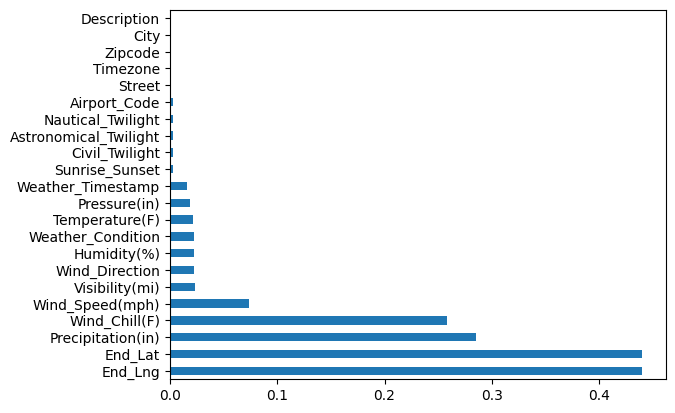

In [ ]:
missing_percentage[missing_percentage>0].plot(kind='barh')

## Exploratory Data Visualization

Columnn we have to Analyze
1- City ,
2- Start Time ,
3- Start Lat,Star Lng ,
4- Temperature ,
5- Weather Condition ,


### City

In [ ]:
import matplotlib as plt
cities=df.City.unique()
len(cities)

13679

In [ ]:
cities_by_accident=df.City.value_counts()
cities_by_accident

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
                ...  
Saint Croix         1
Masardis            1
Okaton              1
Wasta               1
Adell               1
Name: count, Length: 13678, dtype: int64

In [ ]:
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [ ]:
cities_by_accident[:20].plot(kind='barh')


NameError: name 'cities_by_accident' is not defined

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

C:\Users\ug984\AppData\Local\Temp\ipykernel_24932\3456602095.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

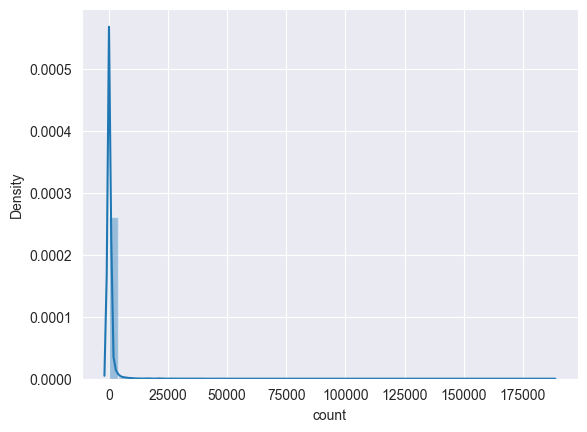

In [ ]:
sns.distplot(cities_by_accident) 

In [ ]:
higher_accidents=cities_by_accident[cities_by_accident>=1000]
low_accident=cities_by_accident[cities_by_accident<1000]


In [ ]:
len(higher_accidents)/len(cities)

0.08904159660793917

<Axes: xlabel='count', ylabel='Count'>

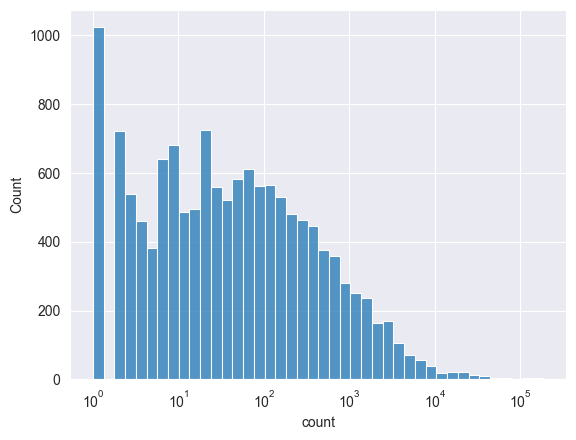

In [ ]:
sns.histplot(cities_by_accident,log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident==1]

City
American Fork-Pleasant Grove    1
Berlin township                 1
District 1 Abingdon             1
Selby                           1
Smackover                       1
                               ..
Saint Croix                     1
Masardis                        1
Okaton                          1
Wasta                           1
Adell                           1
Name: count, Length: 1023, dtype: int64

In [ ]:
'New York' in df.City

False

In [ ]:
'NY' in df.State

False

### Start Time

In [ ]:
pd.to_datetime(df['Start_Time'],format='mixed',errors='coerce')
type(df['Start_Time'])
# df.Start_Time=pd.to_datetime(df.Start_Time)

pandas.core.series.Series

C:\Users\ug984\AppData\Local\Temp\ipykernel_35744\3320439031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

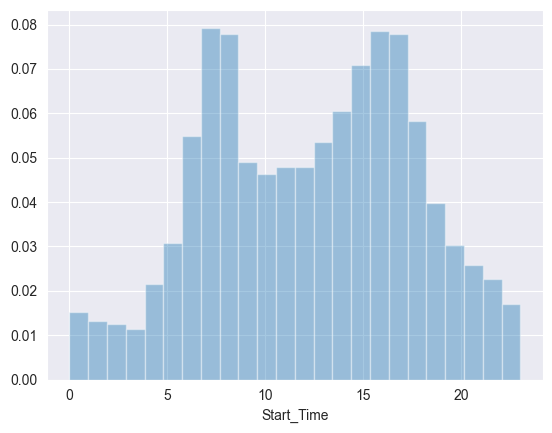

In [ ]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

- A high percentage of accidents occour 6 am to 9 am and 3pm to 6pm (Probably people are in hurry reach office or home)

C:\Users\ug984\AppData\Local\Temp\ipykernel_35744\3398166547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.day_of_week,bins=7,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

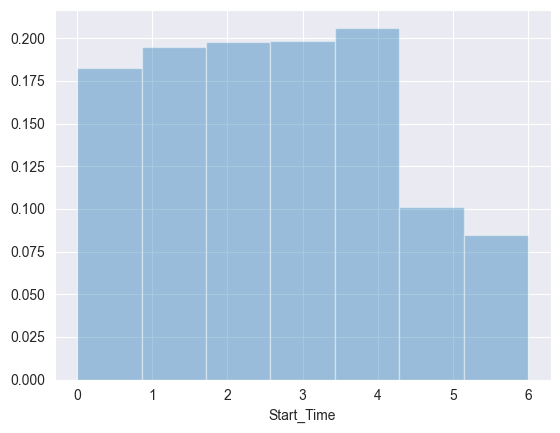

In [ ]:
sns.distplot(df.Start_Time.dt.day_of_week,bins=7,kde=False,norm_hist=True)

is the distribution of accidents by hour the same on weekends as on weekdays

In [ ]:
sundays=df.Start_Time[df.Start_Time.dt.day_of_week==6]
satdays=df.Start_Time[df.Start_Time.dt.day_of_week==5]
Mondays=df.Start_Time[df.Start_Time.dt.day_of_week==1]


sundays


135       2016-02-14 10:13:00
136       2016-02-14 10:49:23
137       2016-02-14 10:41:57
138       2016-02-14 18:15:23
139       2016-02-14 19:17:01
                  ...        
7726136   2019-08-18 22:48:14
7726137   2019-08-18 23:24:10
7726252   2019-08-18 22:56:56
7726253   2019-08-18 22:56:56
7726292   2019-08-18 22:54:41
Name: Start_Time, Length: 562744, dtype: datetime64[ns]

C:\Users\ug984\AppData\Local\Temp\ipykernel_35744\1742858886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

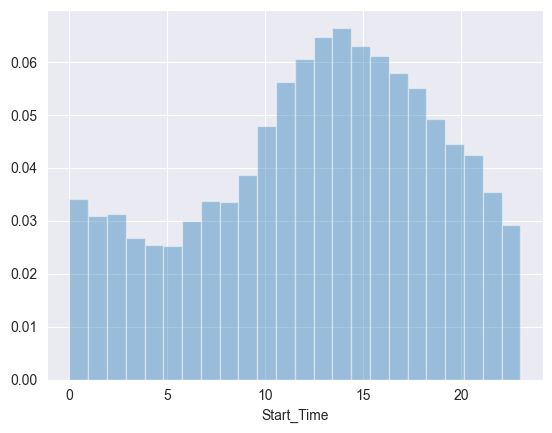

In [ ]:
sns.distplot(sundays.dt.hour,bins=24,kde=False,norm_hist=True)

C:\Users\ug984\AppData\Local\Temp\ipykernel_35744\2655114908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Mondays.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

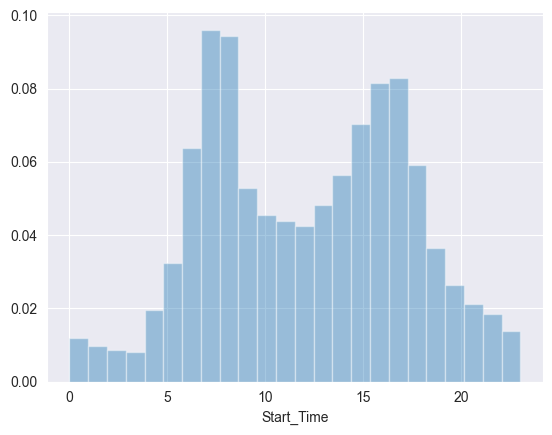

In [ ]:
sns.distplot(Mondays.dt.hour,bins=24,kde=False,norm_hist=True)

on Sundays the peak occurs between 10 am and 3pm unlike week days

C:\Users\ug984\AppData\Local\Temp\ipykernel_35744\1432987045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

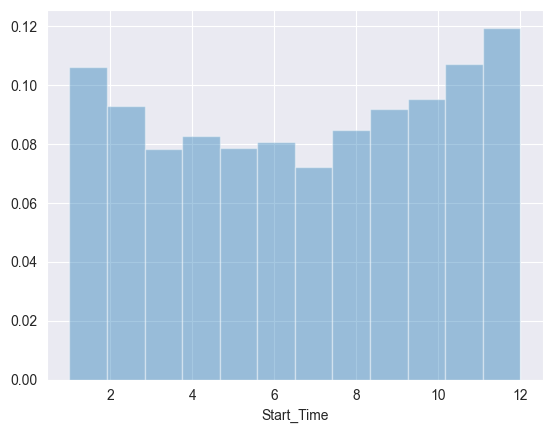

In [ ]:
sns.distplot(Mondays.dt.month,bins=12,kde=False,norm_hist=True)

in summer accidents are getting decreased

C:\Users\ug984\AppData\Local\Temp\ipykernel_35744\2495335399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_source.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

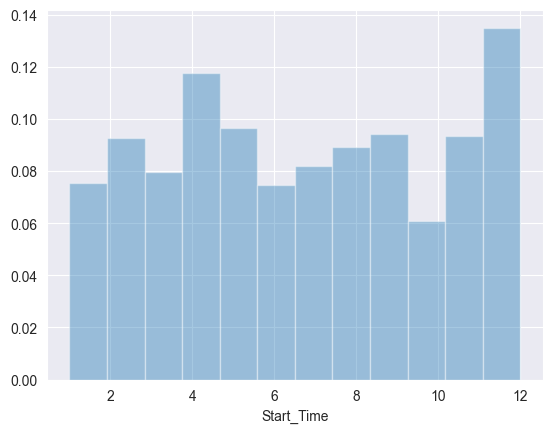

In [ ]:
df_2019=df[df.Start_Time.dt.year==2022]
df_source=df_2019[df_2019.Source=='Source1']
sns.distplot(df_source.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

In [ ]:
df.Source

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: object

can you explain the month wise trend?
- much data is missing for 2016. may be even 2017
- There is an issue with Source 2 Data
- In summer accidents are getting decreased

<Axes: ylabel='count'>

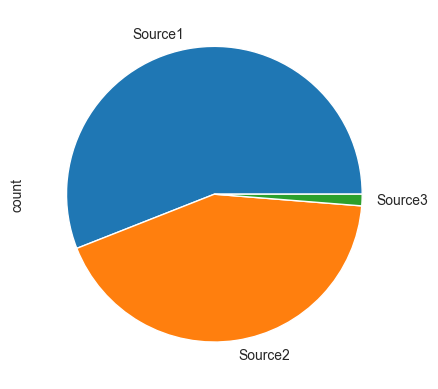

In [ ]:
df.Source.value_counts().plot(kind='pie')

Consider Excluding Source 2 data, seems to have issues

## Ask and answer questions

- on which temp there are more accidents warmer or colder
- Which states has highest no of Accidents per capita
- which time more accidents is happen day or night
- Does New york show up in the data? if yes, why  is the
count lower if this is the most populated city
- Among Top 100 cities in number of Accidents which states do they belong to most frequently
- What time of the day accidents are more frequent in?
- Which day of the week have the most accidents?
- Which month have most Accidents?
- What is the trend of accident year over year?
- When is accidents per unit of traffic is highest.


## Summary and cunclusion  

Insights:
- No Data for newyork
- Number  of accidents per city decreases exponentially
- Less than 8 % of cities have more than 1000 yearly accidents
- Over 1000 cities have just reported just 1 accident(need to investigate)
- Source2 Data for year 2016 and 2017 is not proper

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01
